<hr style="border:1px solid black; width:98%" />

# LAB 3: Loading and analysing Semi-structured data - json file

<hr style="border:1px solid black; width:98%" />

### Importing important libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading semi-structured dataset (JSON file)

In [89]:
df = pd.read_json('TCS_Data.json')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,NaN,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,NaN,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,NaN,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,NaN,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,NaN,695234,0.2624


---

<hr style="border:1px solid black; width:98%" />

### Describe the data structure/set

The TCS Stock Dataset is a comprehensive collection of financial data related to the publicly traded company Tata Consultancy Services (TCS).
This dataset spans a specific timeframe and encompasses various daily metrics that provide insights into the company's stock performance on the market.The dataset includes essential columns such as Date, High, Low, Open, Close, Volume, and Trades, offering a rich tapestry of daily stock market metrics that data scientists can leverage for time series analysis, trend identification, and the application of various technical indicators, enabling a comprehensive exploration of Tata Consultancy Services' stock behavior.

In [90]:
df.describe()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4139,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4139.000000,4.139000e+03,4.139000e+03,2456.000000,4.139000e+03,4139.000000
mean,2012-12-20 14:10:59.289683712,1693.843549,1695.594081,1715.882302,1673.585709,1694.310184,1694.371612,1694.618120,1.676762e+06,2.952102e+14,85502.709283,8.952206e+05,0.549429
min,2004-08-25 00:00:00,366.650000,360.000000,377.750000,358.000000,365.700000,366.650000,368.400000,1.834500e+04,1.370237e+12,1219.000000,7.765000e+03,0.121400
25%,2008-10-14 12:00:00,1106.250000,1105.525000,1120.275000,1088.575000,1107.000000,1106.500000,1105.750000,7.884775e+05,1.050834e+14,46749.500000,4.334740e+05,0.459100
50%,2012-12-17 00:00:00,1633.500000,1625.000000,1655.000000,1610.000000,1630.050000,1636.350000,1629.420000,1.227748e+06,1.824973e+14,68901.000000,7.052640e+05,0.553800
75%,2017-02-21 12:00:00,2326.125000,2321.800000,2345.000000,2301.300000,2325.000000,2326.850000,2319.895000,2.081120e+06,3.455393e+14,110630.250000,1.136132e+06,0.646850
max,2021-04-30 00:00:00,3603.700000,3625.000000,3674.800000,3572.550000,3610.750000,3603.700000,3633.110000,4.403358e+07,1.268362e+16,542541.000000,3.155626e+07,0.962200
std,NaN,722.879316,722.978228,728.450096,717.780248,723.177934,723.061025,723.144157,1.607879e+06,3.849370e+14,56031.488595,8.637908e+05,0.132867


---

<hr style="border:1px solid black; width:98%" />

> ## Data Cleaning

### 1.How do you handle missing values in a DataFrame or JSON data?

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4139 entries, 0 to 4138
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                4139 non-null   datetime64[ns]
 1   Symbol              4139 non-null   object        
 2   Series              4139 non-null   object        
 3   Prev Close          4139 non-null   float64       
 4   Open                4139 non-null   float64       
 5   High                4139 non-null   float64       
 6   Low                 4139 non-null   float64       
 7   Last                4139 non-null   float64       
 8   Close               4139 non-null   float64       
 9   VWAP                4139 non-null   float64       
 10  Volume              4139 non-null   int64         
 11  Turnover            4139 non-null   float64       
 12  Trades              2456 non-null   float64       
 13  Deliverable Volume  4139 non-null   int64         
 1

#### The dataset has some missing values in the 'TRADE' column, replacing the missing values with mean value:

In [92]:
mean = df['Trades'].mean()
df['Trades'].fillna(mean, inplace = True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,85502.709283,5206360,0.3042
1,2004-08-26,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,85502.709283,1294899,0.2561
2,2004-08-27,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,85502.709283,976527,0.2549
3,2004-08-30,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,85502.709283,701664,0.2294
4,2004-08-31,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,85502.709283,695234,0.2624


#### The dataset has two columns with all the same values (Symbol,Series) dropping these columns:

In [93]:
drop_columns = ['Symbol','Series']
df.drop(columns = drop_columns, inplace = True)
df.head()

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,85502.709283,5206360,0.3042
1,2004-08-26,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982865e+14,85502.709283,1294899,0.2561
2,2004-08-27,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715586e+14,85502.709283,976527,0.2549
3,2004-08-30,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005106e+14,85502.709283,701664,0.2294
4,2004-08-31,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602133e+14,85502.709283,695234,0.2624


### 2. What techniques can be used to deal with duplicate records?

In [94]:
df.duplicated().sum()

0

We can drop duplicate rows with 'df.drop_duplicates()' but as the data has no duplicate rows, there is no need to use this command

---

<hr style="border:1px solid black; width:98%" />

> ## Data Visualization

### 1. How can you create visualizations (e.g., plots, charts) to represent trends in the data?


### Bar Plot of Average Close Prices by Month:

Purpose: To visualize the average closing prices for each month.  
Reasoning: Bar plots are effective for comparing categories, and in this case, it helps observe monthly trends in average closing prices.

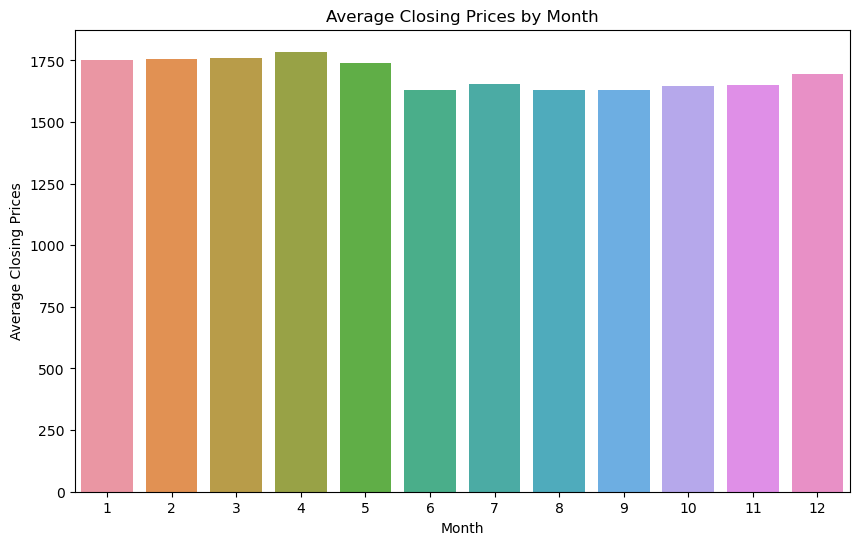

In [60]:
df['Month'] = pd.to_datetime(df['Date']).dt.month
monthly_avg_close = df.groupby('Month')['Close'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg_close.index, y=monthly_avg_close.values)
plt.title('Average Closing Prices by Month')
plt.xlabel('Month')
plt.ylabel('Average Closing Prices')
plt.show()

Insights gained: The average closing prices lie around 1750, the prices were a bit lower during the months (6-9)

---

### Area Plot of Trading Volume Over Time:

Purpose: To illustrate the cumulative trading volume over time.  
Reasoning: Area plots are useful for showing the cumulative effect or contribution of a variable over a continuous scale.

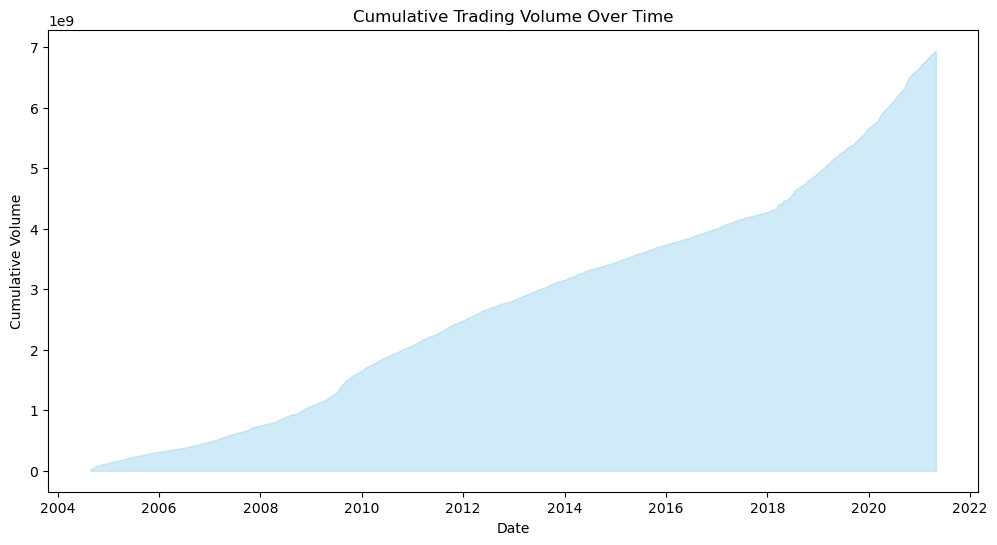

In [63]:
plt.figure(figsize=(12, 6))
plt.fill_between(df['Date'], df['Volume'].cumsum(), color='skyblue', alpha=0.4)
plt.title('Cumulative Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Volume')
plt.show()

Insights gained: The area plot illustrating the cumulative trading volume over time unequivocally portrays a rising trend. This sustained upward rise shows a continuous and substantial increase in trading activity, suggesting heightened market participation.

---

### Heatmap of Correlation Matrix:

Purpose: To visualize the correlation between numerical variables in a compact form.  
Reasoning: Heatmaps are effective for displaying correlation matrices, helping identify strong relationships between variables.

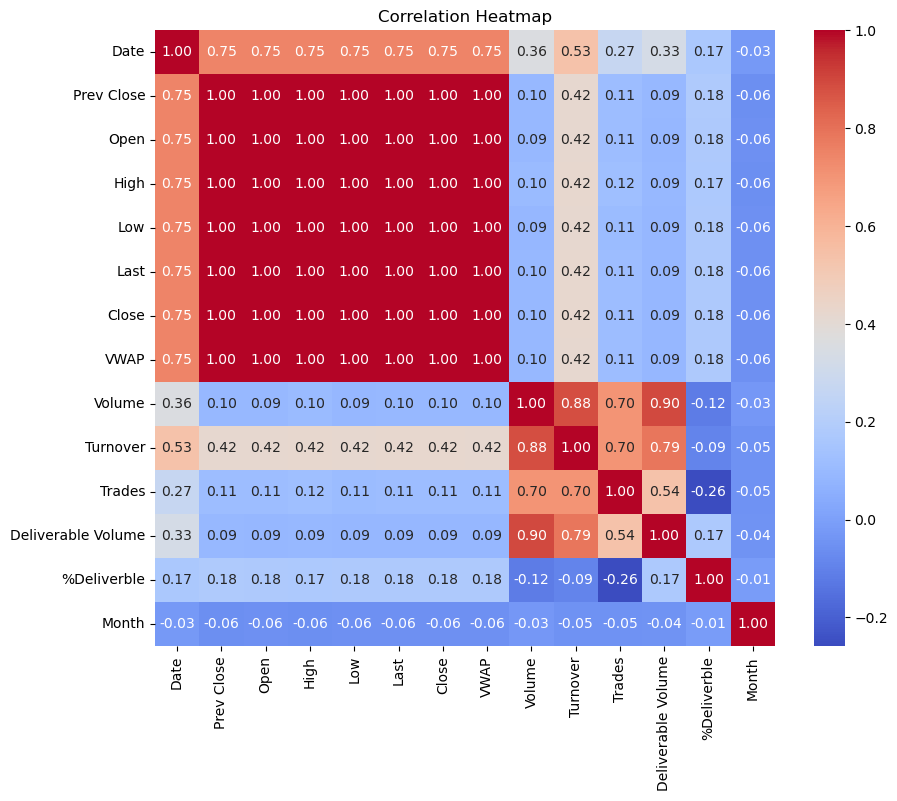

In [64]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

---

### Line Plot of Trades Over Time:

Purpose: To observe the trend in the number of trades over time.  
Reasoning: Line plots are suitable for displaying trends in a variable over a continuous scale, allowing easy identification of patterns.

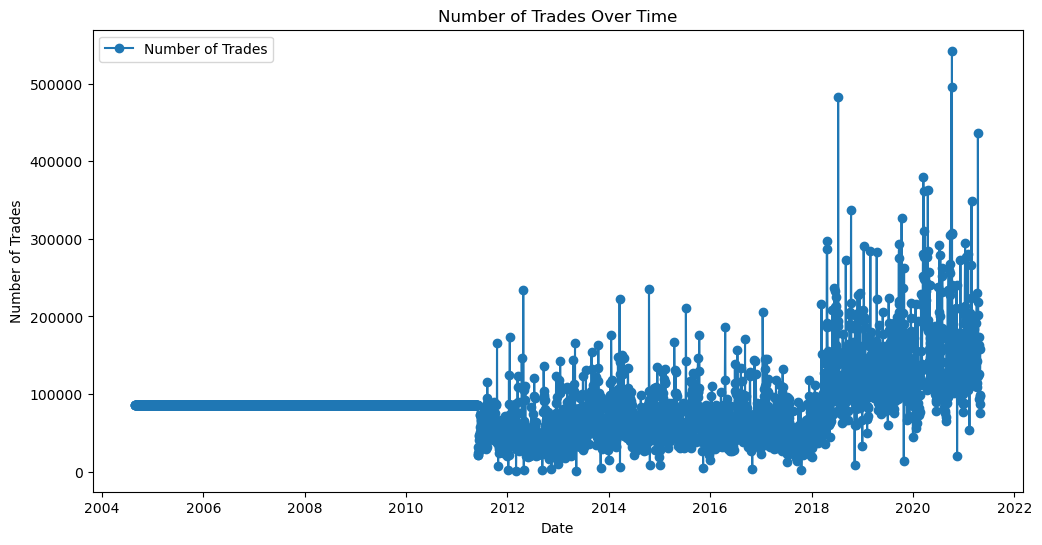

In [66]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Trades'], label='Number of Trades', marker='o')
plt.title('Number of Trades Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trades')
plt.legend()
plt.show()

Insights gained: The line plot effectively captures the temporal evolution of the number of trades, showcasing a steady ascent over the years. This visual representation provides a clear and immediate understanding of the growth in trading frequency. The number of trades increased from the year 2012 , at the time trades were around 100000 and recently in 2022, the number of trades has increased to 500000

---

### 2. What Python libraries are commonly used for data visualization in structured and semi-structured data?

1. Matplotlib: A versatile 2D plotting library that is widely used for creating static plots and charts.  
2. Seaborn: Built on top of Matplotlib, Seaborn provides a high-level interface for creating attractive and informative statistical graphics.  
3. Pandas Plotting: An extension of Matplotlib that provides convenient methods for plotting directly from Pandas DataFrames.  
4. Plotly: A powerful library for creating interactive plots and dashboards, supporting a wide range of chart types.  
5. Bokeh: Designed for creating interactive, web-ready visualizations, Bokeh is particularly useful for building interactive dashboards.  

---

<hr style="border:1px solid black; width:98%" />

> ## Data Transformation


### 1. How can you reshape a DataFrame or JSON data to meet specific analysis requirements?

Pandas has some functions to reshape data:  
Pivot Method:  
Pivoting is a technique used to transform data from a long-form to a wide-form structure, making it easier to analyze and understand relationships between variables.  
Melt Method:  
Melting is a technique used to transform data from a wide-form to a long-form structure. It is particularly useful when you want to consolidate multiple columns into variable and value columns.

I am using pd.melt method on my data

In [68]:
df_melt = pd.melt(df, id_vars=['Date', 'Close'], value_vars=['Open', 'High', 'Low', 'Last', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], var_name='Metric', value_name='MetricValue')
df_melt

,Date,Close,Metric,MetricValue
0,2004-08-25,987.95,Open,1198.7000
1,2004-08-26,979.00,Open,992.0000
2,2004-08-27,962.65,Open,982.4000
3,2004-08-30,986.75,Open,969.9000
4,2004-08-31,988.10,Open,986.5000
...,...,...,...,...
41385,2021-04-26,3100.80,%Deliverble,0.5402
41386,2021-04-27,3132.00,%Deliverble,0.5775
41387,2021-04-28,3124.10,%Deliverble,0.5172
41388,2021-04-29,3115.25,%Deliverble,0.5166


### 2. What methods can be employed to convert data types within a dataset?

1. astype() method: Explicitly convert a column to a desired data type.
2. pd.to_numeric() method: Convert a column to a numeric type, useful for handling columns with numeric values stored as strings.
3. pd.to_datetime() method: Convert a column to datetime type, helpful for handling date-related data.
4. pd.to_timedelta() method: Convert a column to timedelta type, useful for representing durations.
5. pd.to_string() method: Convert a column to string type.
6. pd.to_category() method: Convert a column to categorical type, suitable for columns with a limited number of unique values.
7. apply() method with a custom conversion function: Apply a custom function to convert data types, suitable for more complex conversion scenarios.
8. infer_objects() method: Infer the types of object columns, attempting to convert object types to more specific types when possible.

I have used astype method to convert deliverable volumn column from int to float

In [45]:
df['Deliverable Volume'] = df['Deliverable Volume'].astype(float)
df

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,850.00,1198.70,1198.70,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,85502.709283,5206360.0,0.3042
1,2004-08-26,987.95,992.00,997.00,975.30,976.85,979.00,985.65,5055400,4.982865e+14,85502.709283,1294899.0,0.2561
2,2004-08-27,979.00,982.40,982.40,958.55,961.20,962.65,969.94,3830750,3.715586e+14,85502.709283,976527.0,0.2549
3,2004-08-30,962.65,969.90,990.00,965.00,986.40,986.75,982.65,3058151,3.005106e+14,85502.709283,701664.0,0.2294
4,2004-08-31,986.75,986.50,990.00,976.00,987.80,988.10,982.18,2649332,2.602133e+14,85502.709283,695234.0,0.2624
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4134,2021-04-26,3109.50,3102.05,3153.00,3088.05,3100.05,3100.80,3122.35,2490260,7.775465e+14,87012.000000,1345353.0,0.5402
4135,2021-04-27,3100.80,3106.00,3136.10,3103.00,3132.75,3132.00,3122.18,1471417,4.594036e+14,97077.000000,849767.0,0.5775
4136,2021-04-28,3132.00,3149.95,3151.00,3112.00,3123.00,3124.10,3125.72,1639037,5.123176e+14,76017.000000,847762.0,0.5172
4137,2021-04-29,3124.10,3145.60,3157.35,3105.50,3114.45,3115.25,3130.83,1621395,5.076306e+14,98275.000000,837567.0,0.5166


---

<hr style="border:1px solid black; width:98%" />

> ## Data Integration

### 1.How do you merge or join multiple datasets based on common columns?

Pandas provides several methods for merging or joining DataFrames. Here are the key methods:  
1. pd.merge() Method: Merges two DataFrames based on one or more common columns.  
2. pd.concat() Method: Concatenates two or more DataFrames along a particular axis (either rows or columns).  
3. df.join() Method: Joins two DataFrames based on the index or a specific column.
4. df.merge() Method (DataFrame method): Merges two DataFrames based on one or more common columns.



### 2.Can you demonstrate combining information from both structured and semi-structured data sources?

For demonstration purposes, i have split the dataset into two and have kept one column same 'Date', and then merged the datasets based on this common column

In [107]:
df_1 = df[['Date' ,'Prev Close', 'Open', 'High', 'Low', 'Last' ,'Close']]
df_2 = df[['Date', 'VWAP','Volume','Turnover' ,'Trades' ,'Deliverable Volume','%Deliverble']]


In [114]:
merged_df = pd.merge(df_1, df_2, on='Date')

In [115]:
merged_df

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2004-08-25,850.00,1198.70,1198.70,979.00,985.00,987.95,1008.32,17116372,1.725876e+15,85502.709283,5206360,0.3042
1,2004-08-26,987.95,992.00,997.00,975.30,976.85,979.00,985.65,5055400,4.982865e+14,85502.709283,1294899,0.2561
2,2004-08-27,979.00,982.40,982.40,958.55,961.20,962.65,969.94,3830750,3.715586e+14,85502.709283,976527,0.2549
3,2004-08-30,962.65,969.90,990.00,965.00,986.40,986.75,982.65,3058151,3.005106e+14,85502.709283,701664,0.2294
4,2004-08-31,986.75,986.50,990.00,976.00,987.80,988.10,982.18,2649332,2.602133e+14,85502.709283,695234,0.2624
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4134,2021-04-26,3109.50,3102.05,3153.00,3088.05,3100.05,3100.80,3122.35,2490260,7.775465e+14,87012.000000,1345353,0.5402
4135,2021-04-27,3100.80,3106.00,3136.10,3103.00,3132.75,3132.00,3122.18,1471417,4.594036e+14,97077.000000,849767,0.5775
4136,2021-04-28,3132.00,3149.95,3151.00,3112.00,3123.00,3124.10,3125.72,1639037,5.123176e+14,76017.000000,847762,0.5172
4137,2021-04-29,3124.10,3145.60,3157.35,3105.50,3114.45,3115.25,3130.83,1621395,5.076306e+14,98275.000000,837567,0.5166


<hr style="border:1px solid black; width:98%" />